# Titanic Disaster Survival Using Logistic Regression 

In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## Load the data 

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# No of Males and Females in Titanic
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

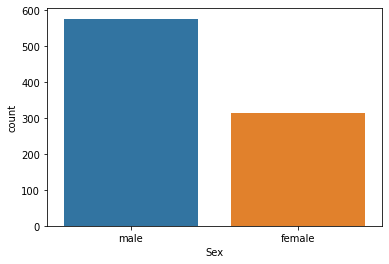

In [7]:
sns.countplot(x = 'Sex', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

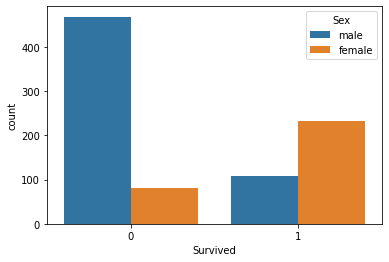

In [8]:
sns.countplot(x='Survived', data = data,hue = 'Sex' )

In [9]:
# How many Null Values are There
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

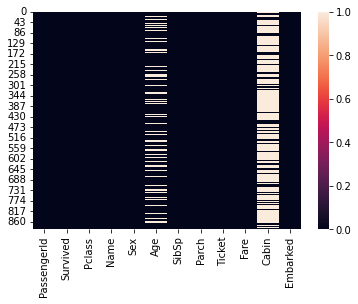

In [10]:
sns.heatmap(data = data.isnull())

In [11]:
# Percentage of Null Values in Sex Column
((data.Age.isnull().sum())/len(data))*100

19.865319865319865

In [12]:
# Percentage of Null Values in Cabin Column
((data.Cabin.isnull().sum())/len(data))*100

77.10437710437711

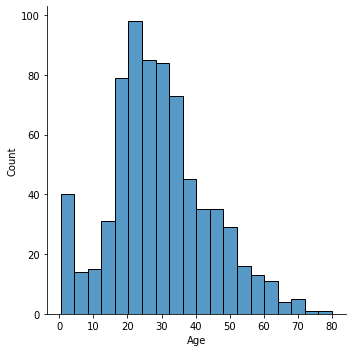

In [13]:
# Distribution Plot by Age
sns.displot(x = 'Age', data = data)

## Data Cleaning

In [14]:
# Fixing Null Values by Filling it With the mean of age
data['Age'].fillna(data.Age.mean(), inplace=True)

In [15]:
# Verify Null Values Now
data['Age'].isnull().sum()


0

<AxesSubplot:>

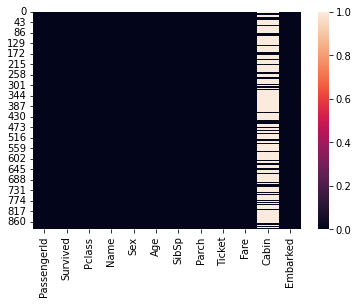

In [16]:
sns.heatmap(data.isnull())

In [17]:
# Drop Cabin Column
data.drop('Cabin', axis = 1, inplace = True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Preparing Data For ML Model

In [22]:
# Check For Non-Numeric Column
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
# Convert Sex Column in Numeric 
data['Gender'] = pd.get_dummies(data['Sex'], drop_first=True)

In [29]:
# Drop Multiple Columns Which Are Not Important
data.drop(['Name','Sex','Embarked','Ticket'], axis = 1, inplace = True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [32]:
# seprate Independent and Dependent Variable 
x = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']] 
y = data['Survived']

In [33]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data Modeling 

In [36]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state= 42) 

In [38]:
# Fit Logistic Regression
lr = LogisticRegression()

In [39]:
lr.fit(x_train,y_train)

/home/rahul/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Its Time For Prediction 
predict = lr.predict(x_test)

## Testing

In [44]:
# Print Confusion Matrix 
pd.DataFrame(confusion_matrix(y_test,predict),columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes']) 



,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [46]:
# Classification Matrix
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

